# 1. Получаем все данные из таблицы

✍ Как вы помните, данные в БД хранятся в таблицах. В этом модуле мы будем работать с таблицей kinopoisk: она содержит данные о 250 лучших фильмах по версии сервиса «Кинопоиск» (рейтинг собран в мае 2020 года).

Давайте посмотрим на таблицу kinopoisk и изучим, какие данные в ней хранятся:

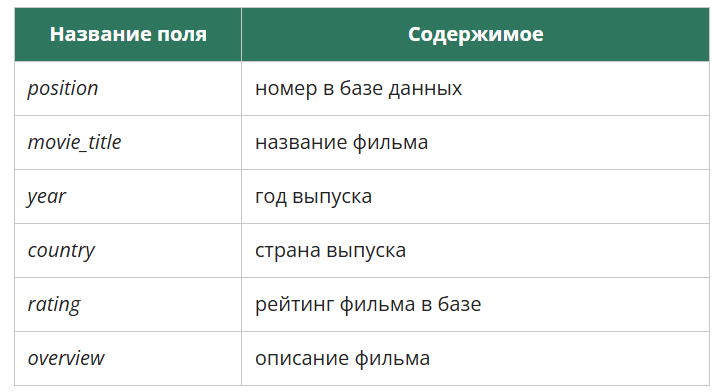

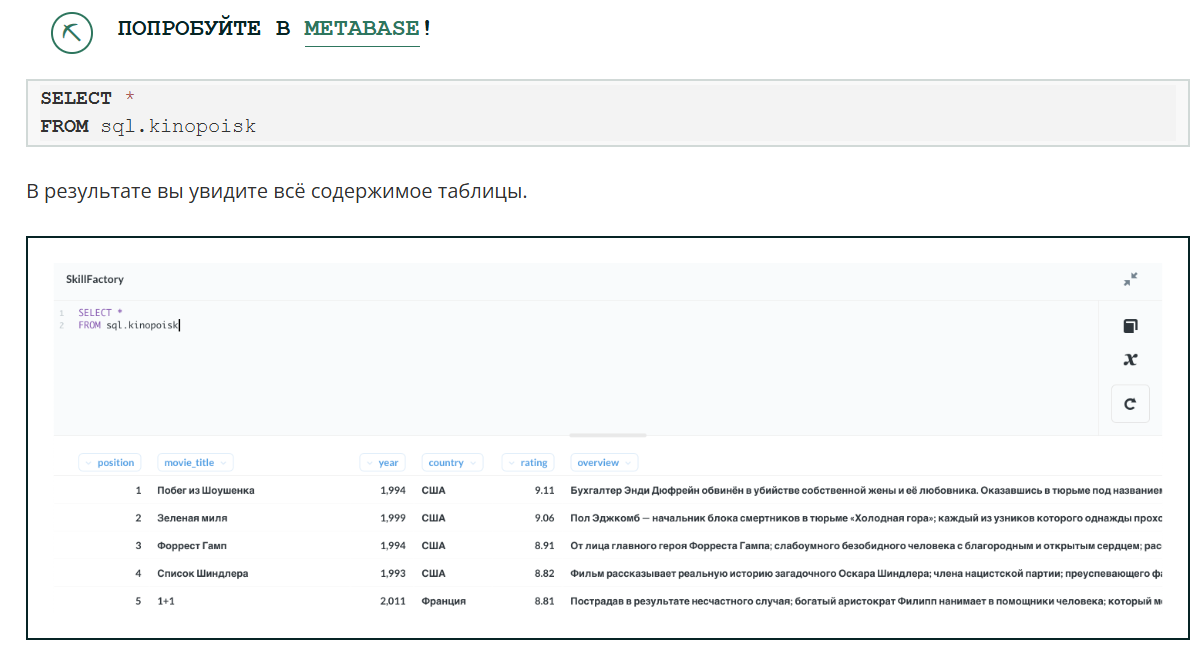

Обратите внимание! Metabase выводит только первые 2 000 строк: в нашем случае таблица полностью уместилась в выводе.

При этом отображена только часть вывода, поскольку не все строки и столбцы влезли на экран. Вы можете увидеть всё содержимое таблицы, прокрутив страницу по вертикали и горизонтали.

Что ещё мы видим? Числа отображаются в американском формате (с десятичным разделителем — точкой и разделителем разрядов — запятой).

Теперь давайте разберём запрос, благодаря которому мы получили такой результат.

### Разбираем запрос

→ Оператор SELECT сообщает СУБД, что вы хотите извлечь из неё данные. SELECT лежит в основе любого SQL-запроса к БД.

→ FROM sql.kinopoisk сообщает, из какой таблицы извлекаются данные. Сначала указывается название схемы, в которой содержится таблица (в нашем случае — это sql), а после точки — название самой таблицы (kinopoisk).

→ Звёздочка * указывает, что вы хотите видеть все столбцы этой таблицы.

Если же вам нужны не все столбцы, а только некоторые, вместо звёздочки перечислите названия всех интересующих вас столбцов через запятую.

Важно! SQL нечувствителен к регистру, поэтому ключевые слова можно писать хоть строчными, хоть прописными буквами: SELECT, select или SeLeCt.

Напишите запрос, который выведет из таблицы kinopoisk столбцы с названием фильма, годом его выпуска и рейтингом.

In [ ]:
SELECT Movie_Title, Year, Rating
FROM sql.kinopoisk

Независимо от того, в каком порядке представлены столбцы в таблице, в запросе вы можете указывать их в любой очерёдности.

Порядок столбцов в выводе будет совпадать с их расположением после оператора SELECT.

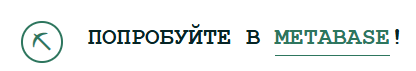

Допустим, вы хотите написать запрос, аналогичный запросу из задания, только вместо года выхода фильма, вам нужен его «возраст» на 2020 год.

В таком случае наш запрос будет выглядеть так:

In [ ]:
SELECT
    movie_title,
    2020 - year,
    rating
FROM sql.kinopoisk

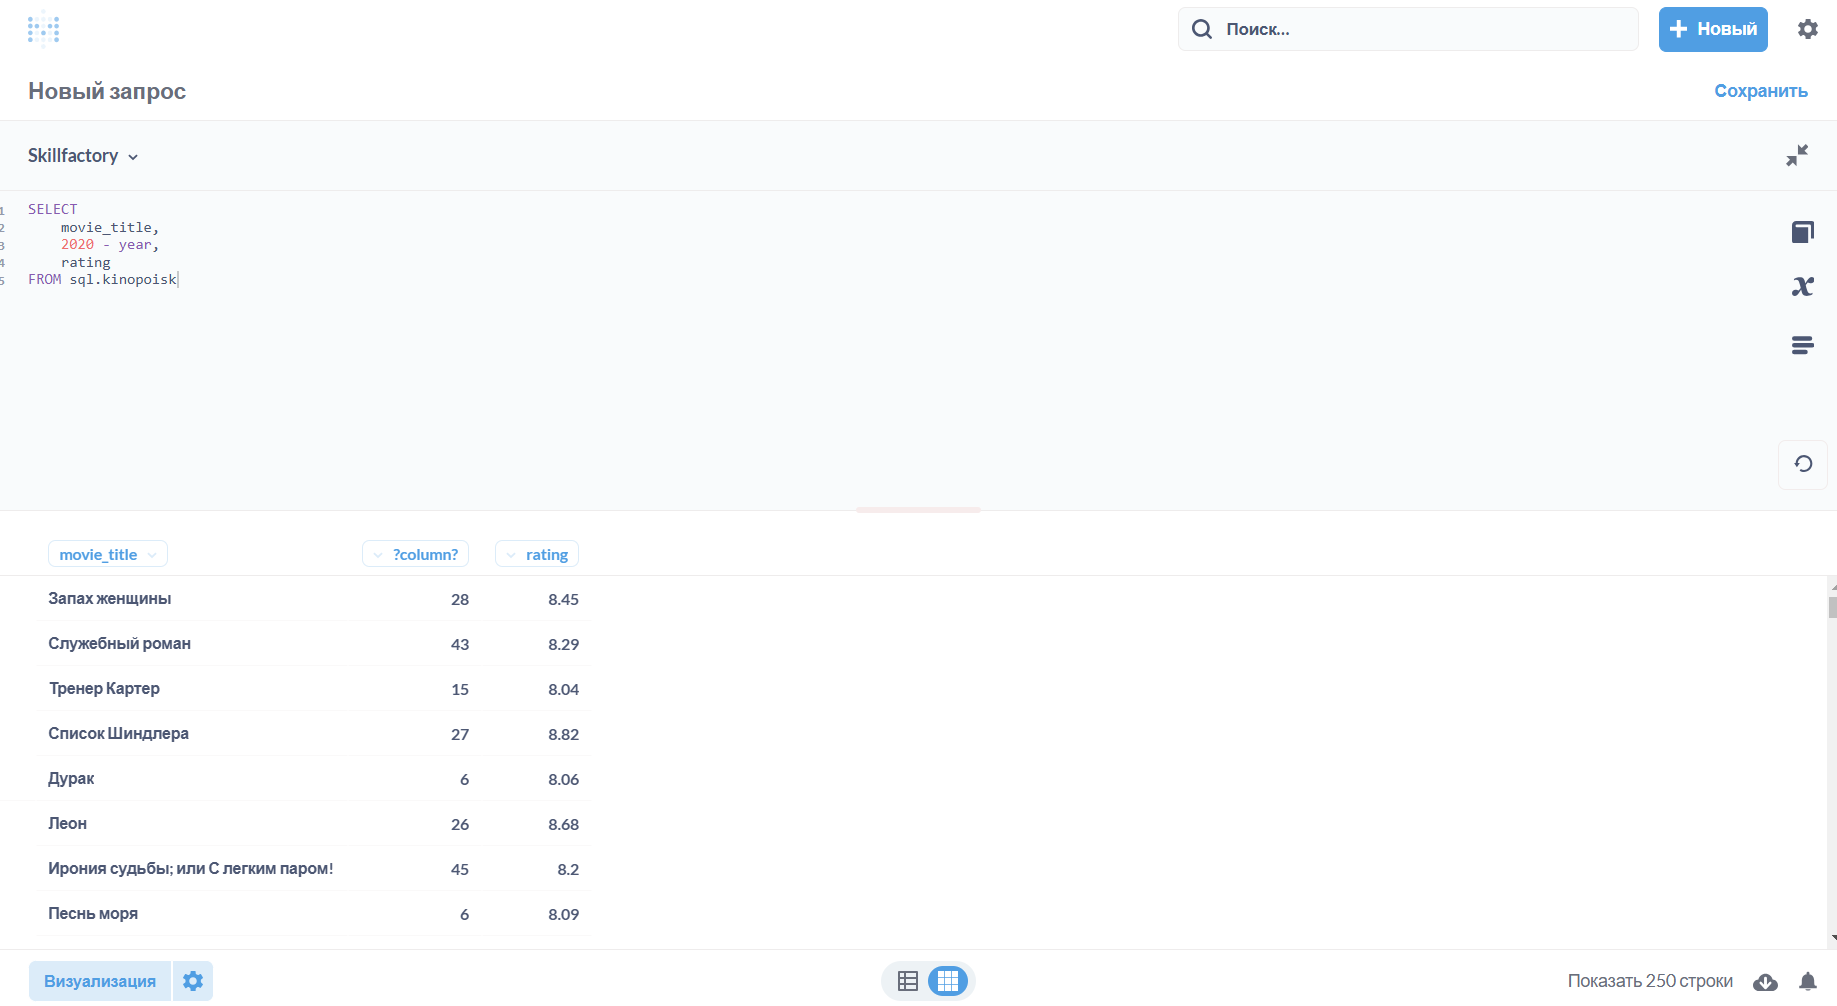

То есть мы отняли от 2020 года год выхода фильма и получили его возраст! Элементарно!

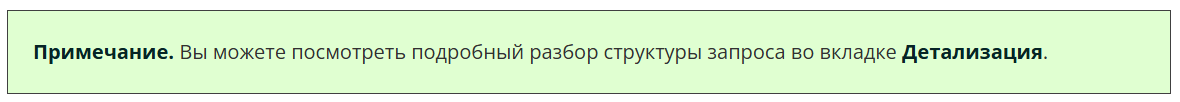

Напишите запрос, который выведет из таблицы kinopoisk следующие столбцы:

- имя режиссёра (director),
- название фильма (movie_title),
- разница между максимально возможным рейтингом (10) и рейтингом этого фильма.

In [ ]:
SELECT
    director,
    movie_title,
    10 - rating
FROM sql.kinopoisk

### Что мы видим?

Столбец с вычислениями в выводе называется ?column?, потому что Metabase не смог подобрать для него название.

Давайте наведём порядок и переименуем столбец!

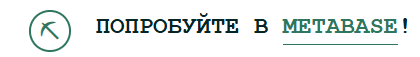

Для этого используем ключевое слово AS и поставим после него новое имя difference. Можем повторить этот процесс для каждого столбца.

In [ ]:
SELECT
    director,
    movie_title,
    10 - rating AS difference
FROM sql.kinopoisk

In [ ]:
SELECT /*выбрать столбцы*/
    director, /*столбец director*/
    movie_title, /*столбец movie_title*/
    10 - rating AS difference /*столбец, значения в котором равны разнице 10 и каждого соответствующего значения столбца rating; присвоить столбцу алиас difference*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

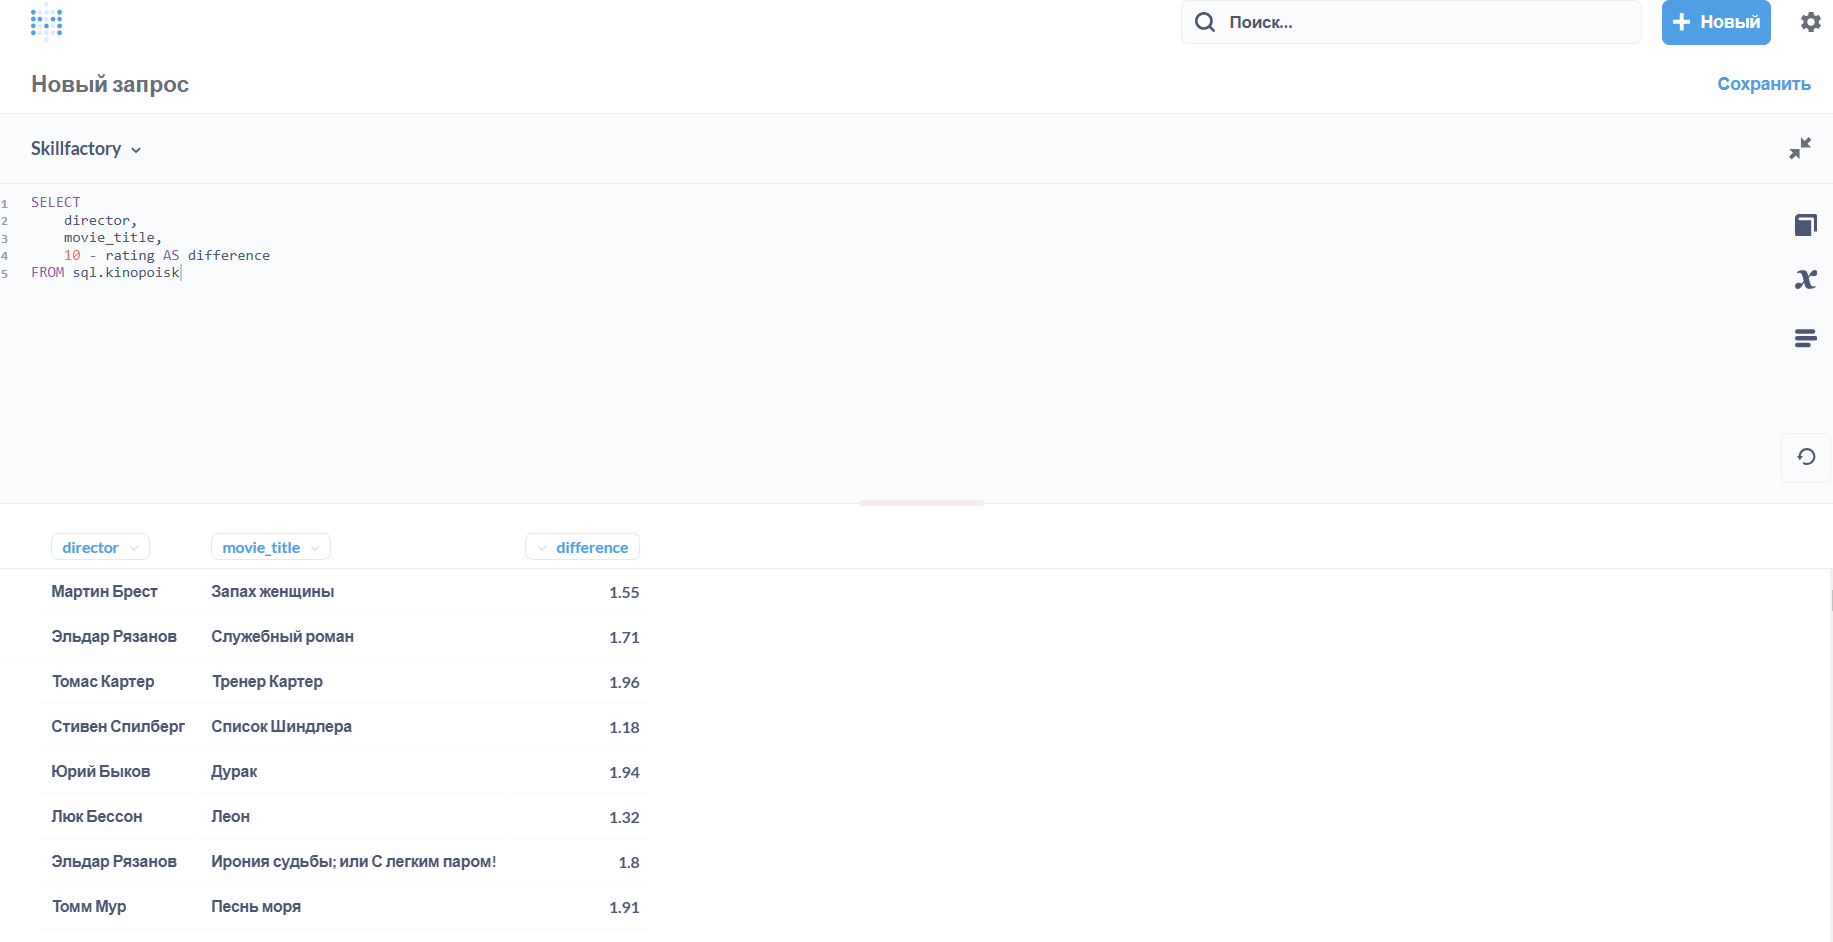

Новое имя является просто псевдонимом, или алиасом, — оно временное и не меняет реального имени столбца в базе данных. Алиас влияет только на то, как столбец отображается в выводе конкретного запроса.

Алиасом может быть как одно слово, так и несколько, а его написание — как латиницей, так и кириллицей.

Обратите внимание! Если в алиасе используются пробелы, необходимо заключать весь псевдоним в двойные кавычки, например, movie_title AS "Movie Title".

⚡ Будьте внимательны! При выполнении заданий в рамках курса используйте алиасы аккуратно. Если в задаче не указано, какое имя нужно присвоить столбцу, значит, его нужно выводить под тем же названием, что дано ему в таблице.

### Простые операции с данными

Со столбцами, которые содержат числовые данные, можно проводить арифметические операции:

- сложение с помощью + ;

- вычитание с помощью - (этот тип операции вы уже проводили, когда - 

- определяли «возраст» фильма);

- умножение с помощью * ;

- деление с помощью / ;

Важно! Если и числитель, и знаменатель — целые числа, результат деления также будет целочисленным, то есть этот оператор произведёт деление нацело.

- получение остатка от деления с помощью % .

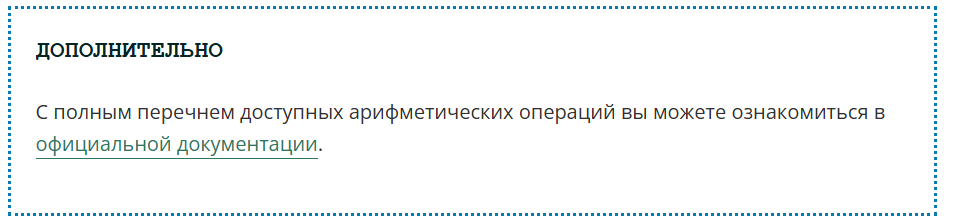

https://postgrespro.ru/docs/postgresql/11/functions-math

Напишите запрос, который выведет столбцы с именем режиссёра, названием фильма, рейтингом по 100-балльной шкале (столбец rating_100). Рейтинг по 100-балльной шкале определите как оценку по 10-балльной, умноженную на 10.

In [ ]:
SELECT
    director,
    movie_title,
    10* rating AS rating_100
FROM sql.kinopoisk

Также мы можем проводить арифметические операции с несколькими столбцами.

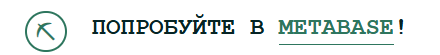

Давайте выведем для каждого фильма результат деления года его выпуска на рейтинг (что бы это ни значило :)).

In [ ]:
SELECT
    movie_title,
    year / rating
FROM sql.kinopoisk

In [ ]:
SELECT /*выбрать столбцы*/
    movie_title, /*столбец movie_title*/
    year / rating /*столбец, значения которого равны результату деления значений столбца year на соответствующие значения столбца rating*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

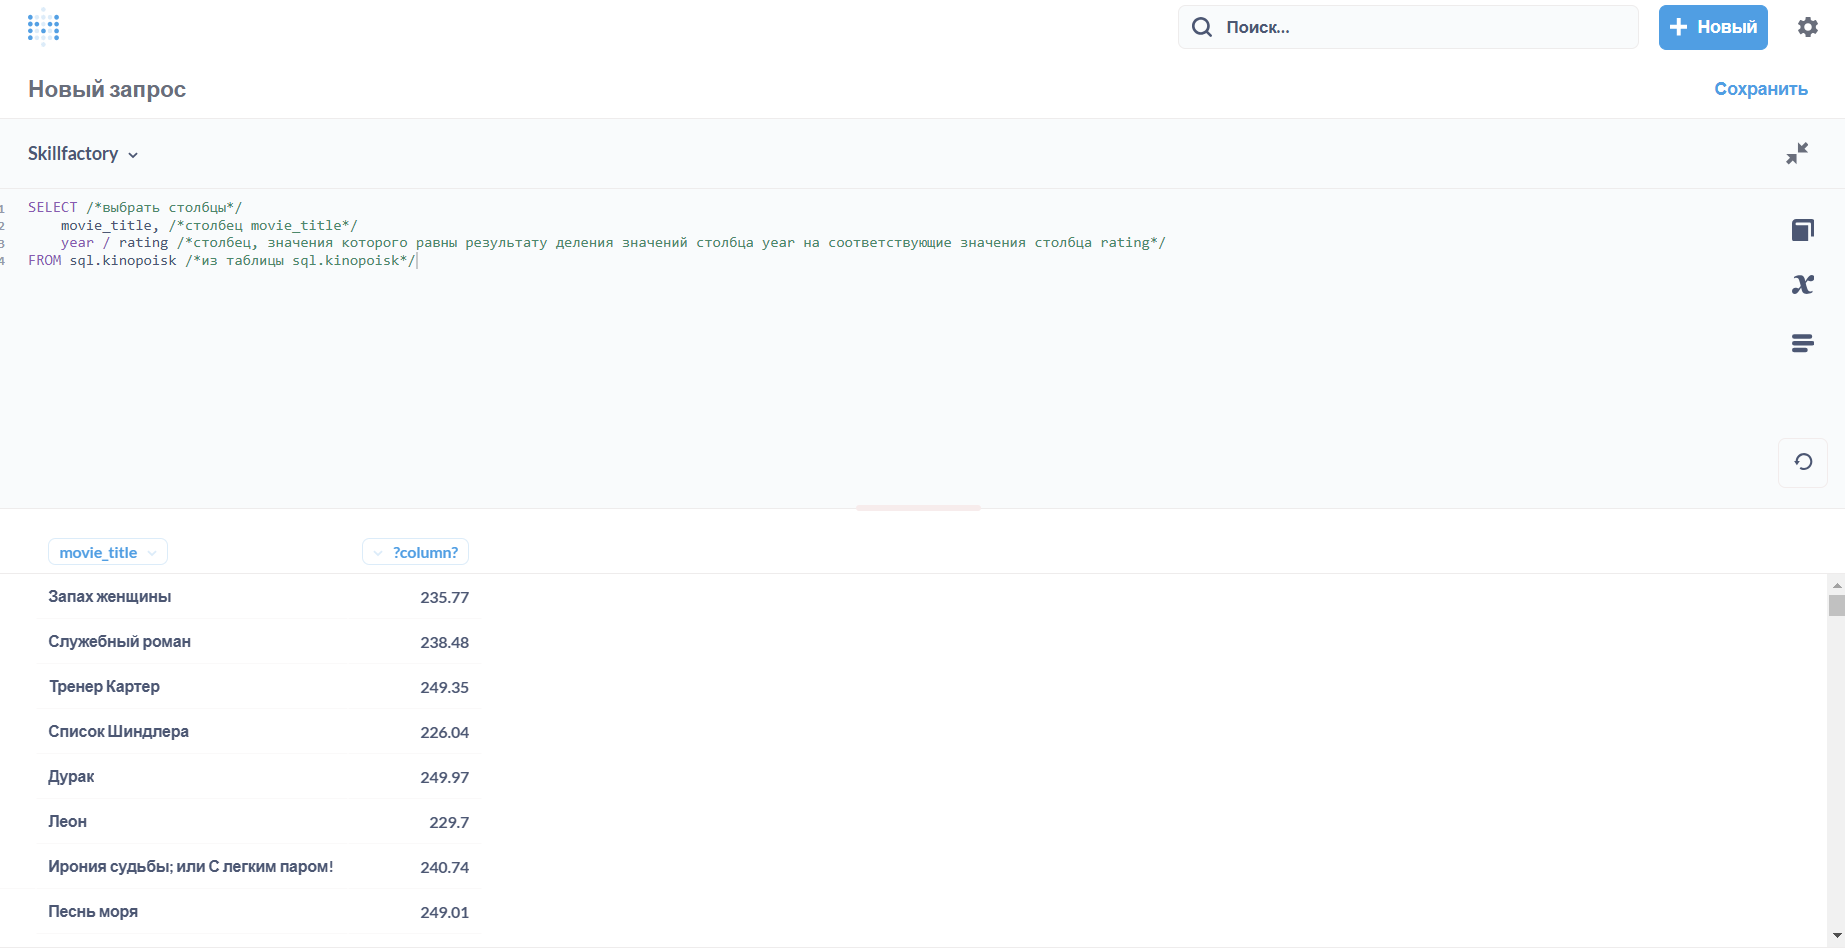

### 2. Фильтруем строки

#### "Where"

Мы уже знаем, что делать, если нам нужны лишь несколько столбцов из таблицы.

Но как быть, если мы хотим видеть не все строки, а только некоторые из них?

В таком случае нам пригодится ключевое слово WHERE.

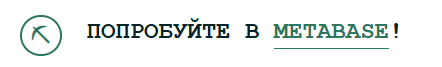

Получим для примера всю информации о фильме, занимающем первую позицию.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE position = 1

In [ ]:
SELECT * /*выбор всех столбцов*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE position = 1 /*с позицией 1*/

Напишите запрос, чтобы вывести все столбцы для фильмов, которые вышли в прокат в 1999 году.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year = 1999

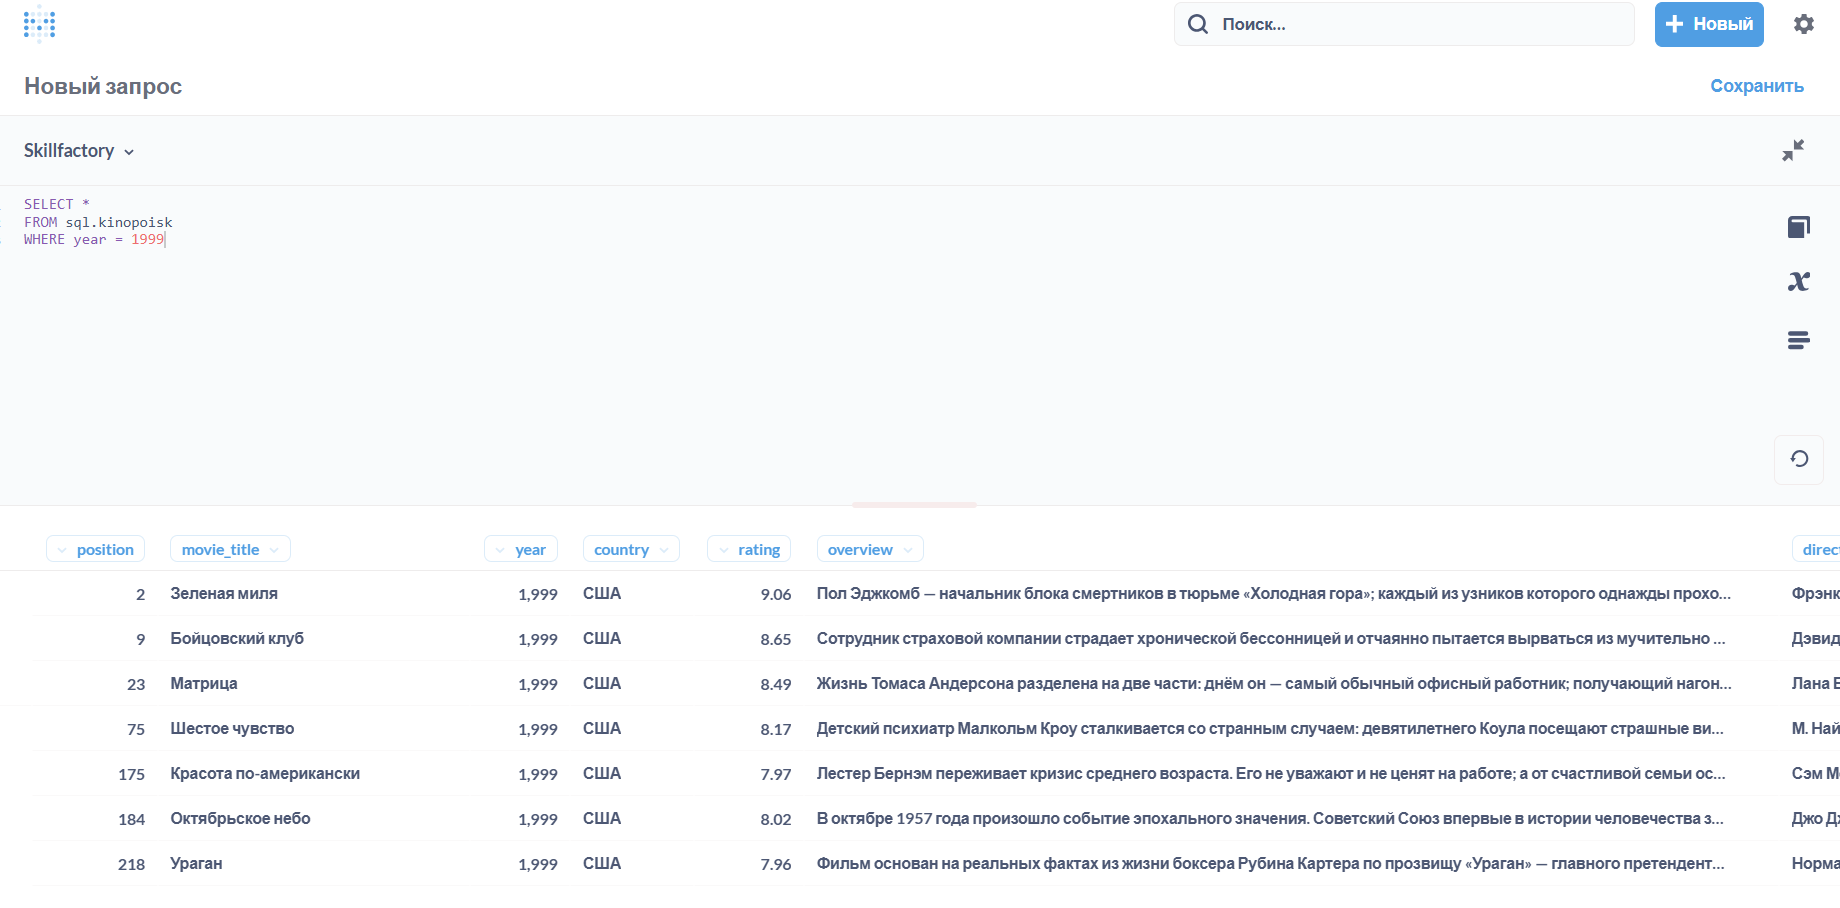

В запросах выше мы использовали знак равно (=), но никто не запретит нам использовать и условные операторы.

Вы можете применять знаки < (меньше), <= (меньше или равно), > (больше), >= (больше или равно).

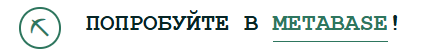

Посмотрим на фильмы, которые вышли в прокат до 1984 года.

In [ ]:
SELECT
    position,
    movie_title,
    year,
    director
FROM sql.kinopoisk
WHERE year < 1984

In [ ]:
SELECT /*выбор всех полей*/
    position, /*столбец position*/
    movie_title, /*столбец movie_title*/
    year, /*столбец year*/
    director /*столбец director*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE year < 1984 /*при условии, что год создания меньше 1984*/

При этом вы можете комбинировать вывод конкретных столбцов и условия.

Ещё один условный оператор, который нам доступен, — знак неравенства != или <>.

Выведем все столбцы для всех фильмов, кроме тех, что были сняты в 2000 году.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year <> 2000

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE year <> 2000 /*если год создания не 2000*/

### "AND и OR"

Допустим, одного условия нам мало.

В таком случае мы можем комбинировать их с помощью AND и OR.

Типичная ситуация: выбираем фильм на вечер. Мы хотим, чтобы фильм был относительно современным и с высоким рейтингом.

In [ ]:
SELECT *
FROM sql.kinopoisk 
WHERE year >= 2000
AND rating >= 8

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE year >= 2000 /*при условии, что год создания больше или равен 2000*/
AND rating >= 8 /*и с рейтингом от 8 и выше*/

Попробуйте заменить в запросе AND на OR — так вы получите фильмы, которые или вышли в 2000 году и позднее, или имеют высокий рейтинг.

Теперь вы хотите получить информацию о фильмах, которые вышли между 1975 и 1985 годами включительно. Можно воспользоваться следующим запросом:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year >= 1975
    AND year <= 1985

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sqk.kinopoisk*/
WHERE year >= 1975 /*при условии, что год создания 1975 и позднее*/
    AND year <= 1985 /*и ранее 1985*/

### "Between"

Мы только что отправили запрос для вывода данных по фильмам с 1975 и 1985 годы. Цели мы достигли, но сама запись оставляет желать лучшего.

Можем оптимизировать её, сделав более элегантной с помощью BETWEEN:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year BETWEEN 1975 AND 1985

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблиц sql.kinopoisk*/
WHERE year BETWEEN 1975 AND 1985 /*при условии, что год создания лежит в промежутке между 1975 и 1985*/

Если вы знаете английский, назначение BETWEEN не станет для вас неожиданностью: оператор фильтрует строки, которые находятся между двумя значениями.

Обратите внимание! В PostgreSQL указанные значения включаются в интервал. В других СУБД BETWEEN может работать иначе и не включать указанные значения.

Напишите запрос, который выведет столбцы с именем режиссёра и названием фильмов, у которых рейтинг больше или равен 8.5. Не забудьте, что в качестве десятичного разделителя используется точка.

In [ ]:
SELECT
    director,
    movie_title
FROM sql.kinopoisk
WHERE rating >= 8.5

Сколько в представленном списке фильмов, имеющих рейтинг от 8.7 до 8.8 включительно?

In [ ]:
SELECT
    director,
    movie_title
FROM sql.kinopoisk
WHERE rating between 8.7 AND 8.8

### "NOT"

В дополнение к другим операторам можно использовать ключевое слово NOT — оно «переворачивает» следующий за ним оператор.

Выведем все фильмы, кроме тех, что вышли с 1965 по 1980 годы.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year NOT BETWEEN 1965 AND 1980

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE year NOT BETWEEN 1965 AND 1980 /*при условии, что год создания не лежит в промежутке между 1965 и 1980*/

Если включаете в запрос несколько условий AND и OR, используйте скобки: они работают так же, как и с арифметическими операциями.

Важно! Условия в скобках имеют больший приоритет.

In [ ]:
SELECT
    year,
    movie_title,
    director
FROM sql.kinopoisk
WHERE (rating > 8.5 AND year < 2000)
    OR year >= 2000

In [ ]:
SELECT /*выбор*/
    year, /*столбец year*/
    movie_title, /*столбец movie_title*/
    director /*столбец director*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE (rating > 8.5 AND year < 2000) /*при условии, что рейтинг больше 8.5 и год создания до 2000*/
    OR year >= 2000 /*или год создания — 2000 и позднее*/

### "IN"

Ещё один полезный оператор для фильтрации строк — IN.

Конструкции с IN имеют следующий вид:

In [ ]:
column IN (value1, value2, value3)

Эта запись аналогична следующей: column = value1 OR column = value2 OR column = value3 — но выглядит проще и компактнее.

Напишите запрос, который выводит названия фильмов, вышедших в прокат в 2000, 1985 и 1939 годах.

In [ ]:
SELECT
    movie_title
FROM sql.kinopoisk
WHERE year IN (2000, 1985, 1939)

До этого при работе с WHERE мы использовали только числа, но мы можем проводить манипуляции и c данными типа текст.

Обратите внимание! Текстовые значения обязательно должны заключаться в одинарные кавычки.

Давайте получим информацию о всех фильмах Леонида Гайдая.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE director = 'Леонид Гайдай'

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE director = 'Леонид Гайдай' /*где режиссёр Леонид Гайдай*/

Попробуйте изменить условие на director = 'ЛЕОНИД ГАЙДАЙ'.

Как видите, ничего не отобразилось, потому что в текстовых полях важен регистр.

### "LIKE"

Предположим, мы не знаем точно, какое текстовое значение ищем.

В таком случае нам поможет оператор LIKE.

Например, чтобы получить все фильмы, название которых начинается на А (кириллическую), мы воспользуемся таким запросом:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE movie_title LIKE 'А%'

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE movie_title LIKE 'А%' /*если название фильма начинается на А*/

Знак процента (%) в примере показывает, что после A встречается ноль и более символов. Вы можете использовать % в любом месте внутри строки.

Например, movie_title LIKE '%а%б%' выведет все фильмы, в названии которых встречается строчная буква а, а где-то после неё — б.

Также в текстовых строках используется знак подчёркивания (_) — он заменяет ровно один любой символ.

Напишите запрос, чтобы вывести название и год выпуска в прокат тех фильмов, которые были сняты режиссёром по имени Дэвид (то есть значение в поле director начинается с 'Дэвид') и имеют рейтинг больше 8.

In [ ]:
SELECT
    movie_title,
    year
FROM sql.kinopoisk
WHERE director LIKE 'Дэвид%'
AND rating > 8

Вернёмся к просмотру всей таблицы с ТОП-250.

Вы можете заметить, что у некоторых строк заполнены не все столбцы.

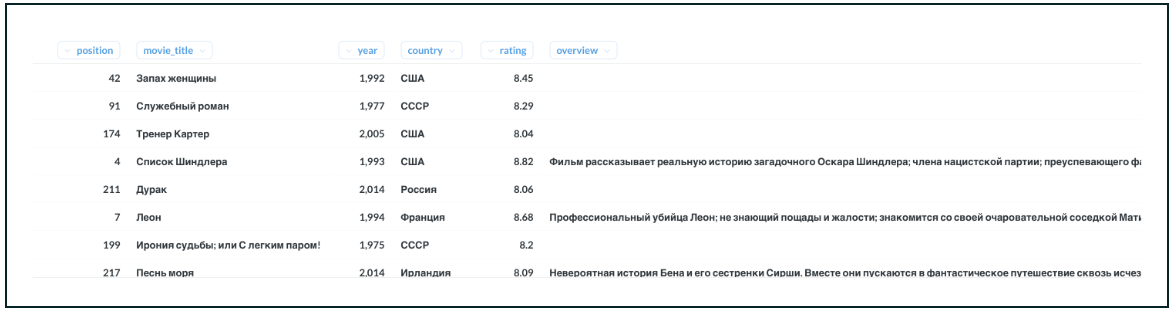

Для пустых значений есть специальное обозначение — NULL.

При этом вы не можете просто приравнять значение к NULL. Проверим это на следующем запросе:

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE overview = NULL /*если у фильма отсутствует описание*/

Как вы заметили, вывод пустой, хотя мы точно видели фильмы с отсутствующим описанием.

А теперь попробуйте изменить условие на overview IS NULL.

Если вы всё сделали верно, то получили все фильмы, у которых в таблице отсутствует описание.

Вы можете добавить к условию уже изученное ключевое слово NOT, чтобы получилось overview IS NOT NULL, тогда в выводе вы увидите только фильмы с заполненным описанием.

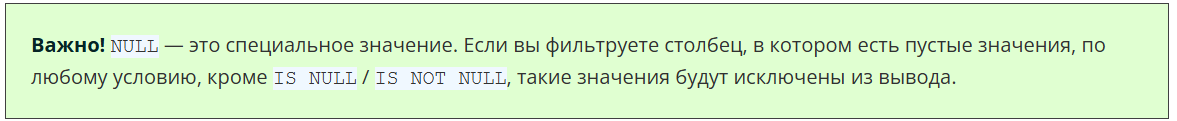

### ORDER BY

Когда мы говорили о последовательности столбцов в выводе, вы, вероятно, задались вопросом: «А в каком порядке выводятся строки?»

Порядок вывода строк может задаваться в настройках базы данных для каждой таблицы. Более того, этот порядок может быть не задан, и тогда от вывода к выводу он будет разным.

Чтобы задать порядок вывода строк в запросе, применим новое ключевое слово ORDER BY.

Для примера отсортируем фильмы по их названию в алфавитном порядке.

In [ ]:
SELECT *
FROM sql.kinopoisk
ORDER BY movie_title

Напишите запрос, который выведет из таблицы kinopoisk все столбцы и отсортируйте строки по возрастанию рейтинга фильма.

In [ ]:
SELECT *
FROM sql.kinopoisk
ORDER BY rating

Как видите, сортировка по возрастанию проводится по умолчанию.

Наш запрос с сортировкой по названию аналогичен такому:

In [ ]:
SELECT *
FROM sql.kinopoisk
ORDER BY rating ASC

Здесь ASC — явное указание порядка сортировки по возрастанию (англ. ascending).

Для обратного порядка используется ключевое слово DESC (англ. descending).

Разумеется, мы можем комбинировать в нашем запросе фильтрацию строк и сортировку вывода, а также выводить только необходимые столбцы.

Выведем названия, имена режиссёров и сценаристов, а также год выхода в прокат фильмов, выпущенных в СССР, и отсортируем результат по убыванию рейтинга.

In [ ]:
SELECT
    movie_title,
    director,
    screenwriter,
    year
FROM sql.kinopoisk
WHERE country = 'СССР'
ORDER BY rating DESC

In [ ]:
SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    director, /*столбец director*/
    screenwriter, /*столбец screenwriter*/
    year /*столбец year*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE country = 'СССР' /*при условии, что страна производства — СССР*/
ORDER BY rating DESC /*сортировка по рейтингу в порядке убывания*/

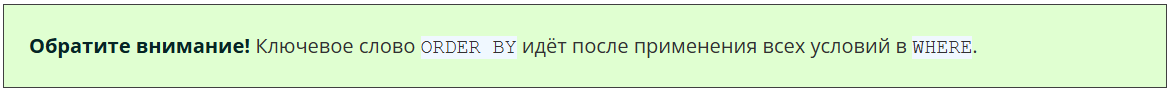

Напишите запрос, который выведет столбцы с названием фильма, его описанием и годом выхода в прокат. Оставьте только те фильмы, у которых рейтинг не ниже 8.2 и страна производства — не США. Отсортируйте вывод по году выхода фильма в порядке убывания.

In [ ]:
SELECT
    movie_title,
    overview,
    year    
FROM sql.kinopoisk
WHERE country != 'США'
AND rating >= 8.2
ORDER BY year DESC

Также в ORDER BY можно указывать, где должны идти пустые значения — в начале или в конце.

Такая настройка порядка вывода задаётся с помощью ключевых слов NULLS FIRST / NULLS LAST.

In [ ]:
SELECT
    movie_title,
    rating,
    overview,
    year
FROM sql.kinopoisk
ORDER BY overview

In [ ]:
SELECT  /*выбор*/
    movie_title,  /*столбец movie_table*/
    rating,  /*столбец rating*/
    overview,  /*столбец overview*/
    year /*столбец year*/
FROM sql.kinopoisk  /*из таблицы sql.kinopoisk*/
ORDER BY overview /*сортировка по столбцу overview*/

А теперь измените последнюю строку скрипта на ORDER BY overview NULLS FIRST.

Такой запрос выведет первыми строки с пустым описанием.

Вы можете сортировать вывод по нескольким столбцам, просто указав их через запятую в ORDER BY (порядок сортировки указывается отдельно для каждого столбца).

Кроме того, вы можете сортировать результат запроса и по тем столбцам, которых нет в выводе.

Получили список всех режиссёров и фильмов из ТОП-250, отсортированных по году выхода в прокат, а внутри года — по рейтингу в порядке убывания.

In [ ]:
SELECT
    director,
    movie_title
FROM sql.kinopoisk
ORDER BY year, rating DESC

In [ ]:
SELECT /*выбор*/
    director, /*столбец director*/
    movie_title /*столбец movie_title*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
ORDER BY year, rating DESC /*сортировка по столбцам year и rating в порядке убывания*/

Напишите запрос, чтобы вывести названия всех фильмов (столбец Название фильма), у которых рейтинг выше 8.3 и страна производства — Франция. Отсортируйте по рейтингу в порядке убывания, далее — по году выхода в прокат (также в порядке убывания).

In [ ]:
SELECT
    movie_title
FROM sql.kinopoisk
WHERE country = 'Франция'
AND rating > 8.3
ORDER BY rating, year DESC

Для упрощения работы с ORDER BY можно использовать не названия столбцов, а их номера из вывода.

In [ ]:
SELECT
    director,
    movie_title,
    year
FROM sql.kinopoisk
ORDER BY 1, 3 DESC

In [ ]:
SELECT /*выбор*/
    director, /*столбец director*/
    movie_title, /*столбец movie_title*/
    year /*столбец year*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
ORDER BY 1, 3 DESC /*сортировка по первому и третьему столбцам*/

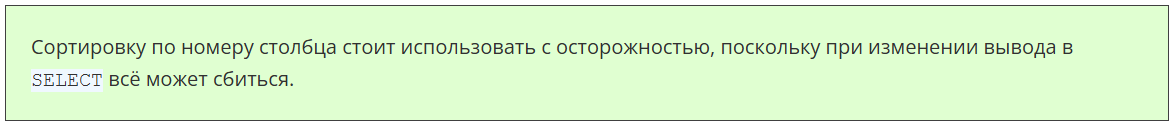

При добавлении новых столбцов в SELECT нужно проверить и при необходимости поправить номера столбцов в ORDER BY.

### "LIMIT"

По умолчанию при любом запросе вы получаете в выводе все строки, попадающие под условия запроса.

Чаще всего именно этого вы и ожидаете, но иногда, например, вам нужно просто взглянуть на содержание таблицы, при этом чем она она больше, тем дольше будет работать запрос.

Ограничим вывод первыми десятью строками и сможем легко понять, какие данные хранятся в таблице, не утяжеляя результат.

In [ ]:
SELECT *
FROM sql.kinopoisk
LIMIT 10

In [ ]:
SELECT * /*выбор всех полей*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
LIMIT 10 /*ограничить вывод десятью значениями*/

Ещё один типичный случай использования ограничения вывода — вывод ТОПа по какому-то показателю.

Выведем ТОП-5 фильмов по рейтингу, сначала отсортировав их по убыванию, а потом оставив только верхние пять строк с помощью LIMIT.

In [ ]:
SELECT
    movie_title,
    rating
FROM sql.kinopoisk 
ORDER BY rating DESC
LIMIT 5

In [ ]:
SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    rating /*столбец rating*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
ORDER BY rating DESC /*сортировка по столбцу rating в порядке убывания*/
LIMIT 5 /*ограничить пятью значениями*/

Напишите запрос, который выводит информацию (Режиссёр, Название фильма и Актёры) по ТОП-20 самых старых (определяем по году выхода в прокат) фильмов из таблицы kinopoisk.

Выведите столбцы Режиссёр, Название фильма, Актёры.

In [ ]:
SELECT
    director,
    movie_title,
    actors
FROM sql.kinopoisk 
ORDER BY year ASC
LIMIT 20

### "OFFSET"

Если LIMIT «оставляет» указанное число первых строк из вывода, то OFFSET, наоборот, «обрезает» указанное число первых строк.

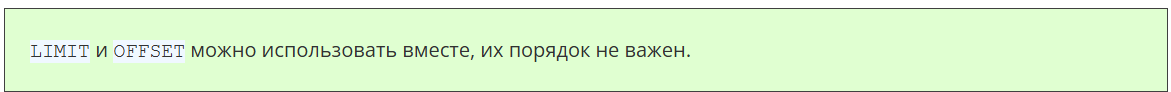

Выведем название и рейтинг фильмов с четвёртого по восьмое место.

In [ ]:
SELECT
    movie_title,
    rating 
FROM sql.kinopoisk
ORDER BY rating DESC
OFFSET 3 LIMIT 5

In [ ]:
SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    rating /*столбец rating*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
ORDER BY rating DESC /*сортировка по столбцу rating в порядке убывания*/
OFFSET 3 LIMIT 5 /*исключить первые три строки и вывести пять следующих за ними*/

Напишите запрос, чтобы вывести названия фильмов, которые вышли в прокат после 1990 года и были сняты не в России. Из этого списка оставьте только те фильмы, которые занимают с 20 по 47 места в рейтинге. Отсортируйте результат по убыванию рейтинга фильмов.

In [ ]:
SELECT
    movie_title
FROM sql.kinopoisk
WHERE year > 1990
AND country != 'Россия'
ORDER BY rating DESC
OFFSET 19 LIMIT 28

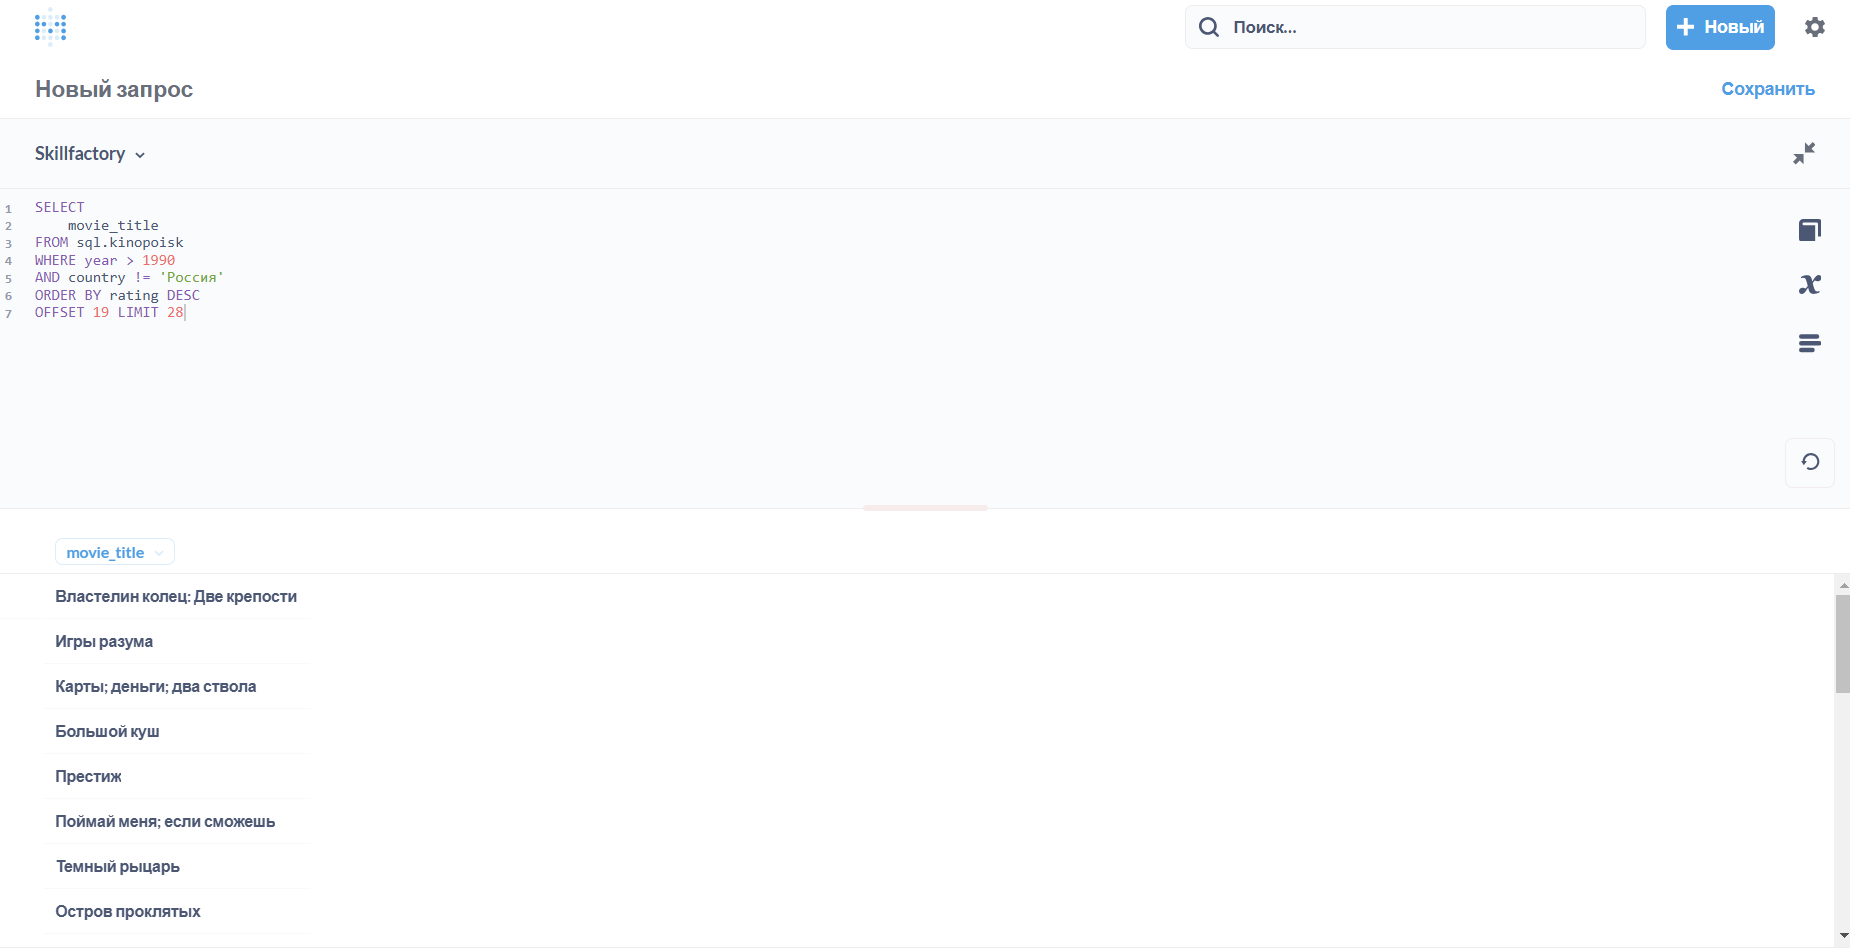

###   5. Итоги

✍ В этом модуле вы отлично потрудились:

- познакомились с первыми операторами и ключевыми словами;
- научились выводить только необходимые столбцы, а также задавать базовые условия для фильтрации строк;
- произвели первые арифметические операции с данными;
- научились сортировать и ограничивать полученные данные.

Этого достаточно, чтобы делать простые запросы к БД.

Напоследок напомним структуру простого запроса:

In [ ]:
SELECT
    столбец1 AS новое_название,
    столбец2,    столбец3
FROM таблица
WHERE (условие1 OR условие2)    AND условие3
ORDER BY сортировка1, сортировка2
OFFSET 1 LIMIT 2

Напишите запрос, который выводит столбцы «Название фильма» (movie_title), «Режиссёр» (director), «Сценарист» (screenwriter), «Актёры» (actors). Оставьте только те фильмы, у которых:

- рейтинг между 8 и 8.5 (включительно) ИЛИ год выхода в прокат до 1990;
- есть описание;
- название начинается не с буквы 'Т';
- название состоит ровно из 12 символов.

Оставьте только топ-7 фильмов, отсортированных по убыванию рейтинга.

In [ ]:
SELECT
    movie_title,
    director,
    screenwriter,
    actors
FROM sql.kinopoisk
WHERE (rating BETWEEN 8 AND 8.5 OR year < 1990)
    AND overview IS NOT NULL
    AND movie_title NOT LIKE 'Т%'
    AND movie_title LIKE '____________'
ORDER BY rating DESC
LIMIT 7